### A Basic set of text processing functions

In [58]:
def preprocess(s, lowercase=True, strip_punctuation=True):
    """
    Input:
        string s
        boolean lowercase
        boolean strip_punctuation
    Return:
        list of strings
    """
    punctuation = '.,?<>:;"\'!%[]_`*-'
    if isinstance(s, str):
        s = tokenize(s)
    if lowercase:
        s = [t.lower() for t in s]
    if strip_punctuation:
        s = [t.strip(punctuation) for t in s]
    s = [t for t in s if t !='']
        
    return s

def tokenize(text):
    return text.split()

def token_frequency(text, relative=False):
    """
    Input: text - list of strings
    """
    freqs = {}
    for token in text:
        if token in freqs:
            freqs[token] += 1
        else:
            freqs[token] = 1
    if relative:
        total = len(text)
        for token in freqs:
            freqs[token] = freqs[token]/total
    return freqs

def document_frequency(tfs_list):
    df = {}
    for tf in tfs_list:
        for token in tf:
            if token in df:
                df[token] += 1
            else:
                df[token] = 1
    return df

def type_token(text):
    types = len(set(text))
    tokens = len(text)
    return (types, tokens)

def cartesian_distance(v1, v2):
    dist = 0
    for feature in set(list(v1.keys())+list(v2.keys())):
        if feature in v1 and feature in v2:
            dist += (v1[feature]-v2[feature])**2
        elif feature in v1 and feature not in v2:
            dist += (v1[feature]-0)**2
        else:
            dist += (v2[feature]-0)**2
    return dist**0.5

def token_group_frequency(tf, featureset_list):
    vec = []
    
    for featureset in featureset_list:
        f = 0
        for feature in featureset:
            if feature in tf:
                f += tf[feature]
        vec.append(f)
    return vec

def chunk_corpus(text, chunksize):
    chunks = []
    for start in range(0, len(text)-chunksize+1, chunksize):
        chunk = text[start:start+chunksize]
        chunks.append(chunk)
    return chunks

#### Read a text file and compute raw frequencies of all tokens

In [5]:
s = 'to BE, or NOT to BE!'
#filename = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/hamlet.txt'
#f = open(filename, 'r')
#s = f.read()
s = preprocess(s)
f = token_frequency(s)
print(f)

{'to': 2, 'be': 2, 'or': 1, 'not': 1}


#### Read all plays by Shakespeare and compute token frequencies for each

In [6]:
import glob

myfiles = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/*.txt'
filenames = glob.glob(myfiles)
token_frequencies = []
for filename in filenames:
    text = open(filename, 'r').read()
    tokenized = preprocess(text)
    freqs = token_frequency(tokenized)
    token_frequencies.append(freqs)
print(token_frequencies)

[{'if': 104, 'music': 6, 'be': 205, 'the': 545, 'food': 1, 'of': 410, 'love': 74, 'play': 10, 'on': 66, 'give': 39, 'me': 238, 'excess': 1, 'it': 194, 'that': 276, 'surfeiting': 1, 'appetite': 3, 'may': 38, 'sicken': 1, 'and': 483, 'so': 127, 'die': 4, 'strain': 1, 'again': 19, 'had': 32, 'a': 399, 'dying': 1, 'fall': 6, 'o': 75, 'came': 6, "o'er": 4, 'my': 338, 'ear': 5, 'like': 42, 'sweet': 19, 'sound': 2, 'breathes': 1, 'upon': 34, 'bank': 1, 'violets': 1, 'stealing': 1, 'giving': 1, 'odour': 1, 'enough': 15, 'no': 124, 'more': 59, 'tis': 33, 'not': 227, 'now': 70, 'as': 146, 'was': 41, 'before': 17, 'spirit': 5, 'how': 59, 'quick': 2, 'fresh': 6, 'art': 25, 'thou': 131, 'notwithstanding': 1, 'thy': 106, 'capacity': 3, 'receiveth': 1, 'sea': 5, 'nought': 1, 'enters': 1, 'there': 45, 'what': 127, 'validity': 1, 'pitch': 1, "soe'er": 1, 'but': 164, 'falls': 1, 'into': 19, 'abatement': 1, 'low': 3, 'price': 2, 'even': 15, 'in': 257, 'minute': 1, 'full': 7, 'shapes': 1, 'is': 243, 'fanc

#### Find the most significant words in Macbeth using tf-idf

In [7]:
import glob, math
mb_path = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/macbeth.txt'
plays_path = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/*.txt'

plays_freqs = []
play_files = glob.glob(plays_path)
for play in play_files:
    tokens = preprocess(open(play, 'r').read())
    plays_freqs.append(token_frequency(tokens))

df = document_frequency(plays_freqs)

mb_tokens = token_frequency(preprocess(open(mb_path, 'r').read()), relative=True)

tfidf = {}
for token in mb_tokens:
    token_tfidf = mb_tokens[token] * math.log((len(play_files)/df[token]))
    tfidf[token] = token_tfidf
sorted(tfidf.items(), key = lambda x: x[1], reverse=True)

[('macbeth', 0.008951156115310133),
 ('thane', 0.005458022021530568),
 ('banquo', 0.0048030593789469),
 ('cawdor', 0.004584738498085677),
 ('macduff', 0.0034931340937795637),
 ('duncan', 0.0028381714511958953),
 ('birnam', 0.0021832088086122274),
 ('fleance', 0.0019648879277510047),
 ('dunsinane', 0.0019648879277510047),
 ('glamis', 0.0017465670468897819),
 ('cauldron', 0.0017465670468897819),
 ('malcolm', 0.0015282461660285592),
 ('weird', 0.0013099252851673363),
 ('scotland', 0.0011972283095412184),
 ('thanes', 0.0010916044043061137),
 ('donalbain', 0.0010916044043061137),
 ("banquo's", 0.0010916044043061137),
 ('siward', 0.0008732835234448909),
 ('daggers', 0.0008418768844982373),
 ('knocking', 0.0007641230830142796),
 ("tyrant's", 0.0007216087581413464),
 ('norweyan', 0.0006549626425836682),
 ('equivocator', 0.0006549626425836682),
 ("duncan's", 0.0006549626425836682),
 ('scone', 0.0006549626425836682),
 ('sundry', 0.0006549626425836682),
 ('fife', 0.0006013406317844553),
 ('sister

### Plot types against tokens for all Shakespeare plays

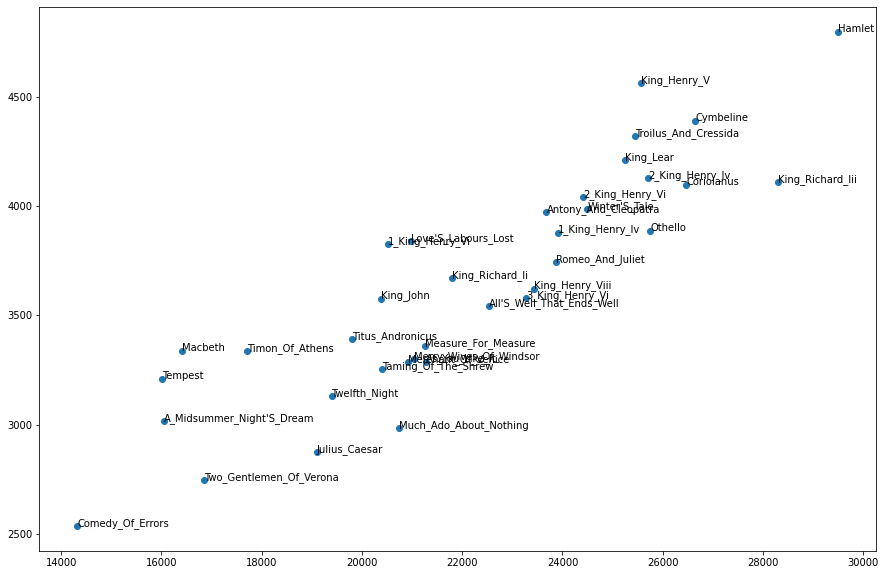

In [8]:
import glob
import matplotlib.pyplot as plt

myfiles = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/*.txt'
filenames = glob.glob(myfiles)
x = []
y = []
label = []
for filename in filenames:
    tokens = preprocess(open(filename, 'r').read())
    x.append(len(tokens))
    y.append(len(set(tokens)))
    label.append(filename.split('/')[-1][:-4].title())

plt.figure(figsize=(15,10))

plt.scatter(x, y)
for i, l in enumerate(label):
    plt.text(x[i], y[i], l)

#### Plot the typetoken ratios of 1000 word chunks from Macbeth in steps of 10 tokens

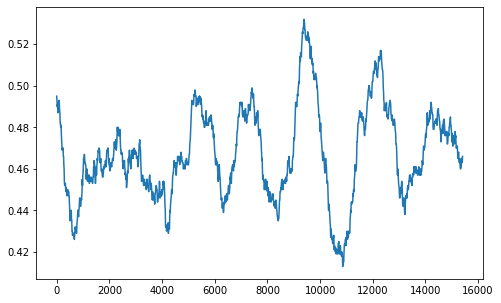

In [9]:
filename = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/macbeth.txt'
text = preprocess(open(filename, 'r').read())

chunksize = 1000
stepsize = 10

x = []
y = []


for start in range(0, len(text)-chunksize, stepsize):
    chunk = text[start : start+chunksize]
    types, tokens = type_token(chunk)
    #print(types, tokens, types/tokens)
    x.append(start)
    y.append(types/tokens)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(x, y)
plt.show()

### Plot zipf's law - first as raw frequency against rank of the top 500 tokens, and then as a log log plot.

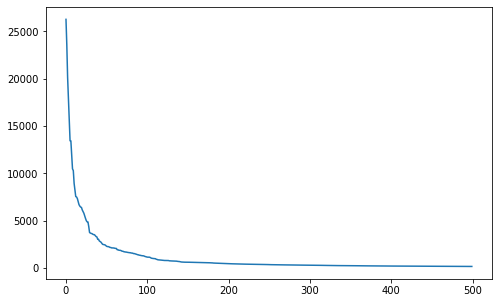

In [10]:
import glob

myfiles = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/*.txt'
filenames = glob.glob(myfiles)
token_frequencies = []
for filename in filenames:
    text = open(filename, 'r').read()
    tokenized = preprocess(text)
    freqs = token_frequency(tokenized)
    token_frequencies.append(freqs)

corpus_tfs = {}
for text in token_frequencies:
    for token in text:
        if token in corpus_tfs:
            corpus_tfs[token] += text[token]
        else:
            corpus_tfs[token] = text[token]
sorted_tokens = sorted(corpus_tfs.items(), key = lambda x: x[1], reverse=True)

x = list(range(len(sorted_tokens)))[:500]
#x = [math.log(r+1) for r in x]
y = [f for t, f in sorted_tokens][:500]
#y = [math.log(f) for t, f in sorted_tokens]

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(x, y)
plt.show()

##### Turn a set of strings into a list of vectors where features have a document frequency of 2 or greater

In [11]:
docs = ['humpty dumpty sat on a wall', \
        'humpty dumpty had a great fall', \
        'the fall of the wall was great']

vectors = []
for d in docs:
    tf = token_frequency(preprocess(d), relative=True)
    vectors.append(tf)
    
dfs = document_frequency(vectors)

corpus_vectors = []
for vec in vectors:
    doc_vector = {}
    for term in vec:
        if dfs[term] >= 2:
            doc_vector[term] = vec[term]
    corpus_vectors.append(doc_vector)
print(corpus_vectors)

[{'humpty': 0.16666666666666666, 'dumpty': 0.16666666666666666, 'a': 0.16666666666666666, 'wall': 0.16666666666666666}, {'humpty': 0.16666666666666666, 'dumpty': 0.16666666666666666, 'a': 0.16666666666666666, 'great': 0.16666666666666666, 'fall': 0.16666666666666666}, {'fall': 0.14285714285714285, 'wall': 0.14285714285714285, 'great': 0.14285714285714285}]


##### Find the most similar to least similar plays by Shakespeare based on a feature set of words that occur in every play

In [30]:
import glob, itertools

filepath = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/*.txt'
filenames = glob.glob(filepath)

vectors = []
for fn in filenames:
    tf = token_frequency(preprocess(open(fn, 'r').read()), relative=True)
    vectors.append(tf)

dfs = document_frequency(vectors)

corpus_vectors = []
for vec in vectors:
    doc_vector = {}
    for term in vec:
        if dfs[term] == len(filenames):
        #if dfs[term] > 30 :
            doc_vector[term] = vec[term]
    corpus_vectors.append(doc_vector)
    
labels = [fn.split('/')[-1][:-4].replace('_', ' ').title() for fn in filenames]

indices = list(range(len(filenames)))
pair_indices = itertools.combinations(indices, 2)
distances = []
for p1, p2 in pair_indices:
    dist = cartesian_distance(corpus_vectors[p1], corpus_vectors[p2])
    distances.append((dist, p1, p2))
distances = sorted(distances)
for dist, p1, p2 in distances:
    print('{:>25} : {:<25} : {:1.3f}'.format(labels[p1], labels[p2], dist))

                Cymbeline : Winter'S Tale             : 0.009
          1 King Henry Vi : 2 King Henry Vi           : 0.012
          2 King Henry Vi : 3 King Henry Vi           : 0.012
                Cymbeline : Antony And Cleopatra      : 0.012
          2 King Henry Vi : King Richard Ii           : 0.013
          1 King Henry Vi : King Richard Ii           : 0.013
          3 King Henry Vi : Titus Andronicus          : 0.013
                King Lear : Antony And Cleopatra      : 0.013
          1 King Henry Vi : King John                 : 0.013
          King Richard Ii : King Richard Iii          : 0.014
                King Lear : Cymbeline                 : 0.014
          3 King Henry Vi : King Richard Ii           : 0.014
                  Othello : All'S Well That Ends Well : 0.014
           As You Like It : Much Ado About Nothing    : 0.014
            Winter'S Tale : Antony And Cleopatra      : 0.015
           As You Like It : All'S Well That Ends Well : 0.015
        

##### Use KMeans to cluster Shakespeare into 3 clusters. Try with different feature sets.

In [31]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)
vectors = vectorizer.fit_transform(corpus_vectors)
print(vectors)
features = vectorizer.feature_names_
len(features)

[[0.02057337 0.00051562 0.00072187 ... 0.00886872 0.00036094 0.0004125 ]
 [0.01277688 0.00099492 0.00047128 ... 0.00680735 0.00052364 0.00062837]
 [0.02076872 0.00032892 0.00070482 ... 0.00911568 0.00032892 0.00042289]
 ...
 [0.01764452 0.00031438 0.00047157 ... 0.00491217 0.00015719 0.00031438]
 [0.01857774 0.00037626 0.00075252 ... 0.01378045 0.00023516 0.00051735]
 [0.01694628 0.00061007 0.0004406  ... 0.008202   0.00020336 0.00050839]]


337

In [32]:
from sklearn.cluster import KMeans

n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(vectors)
print(kmeans.labels_)

for nc in range(n_clusters):
    print("\nCluster {}:".format(nc))
    cluster_labels = [l for i, l in enumerate(labels) if kmeans.labels_[i]==nc]
    print(', '.join(cluster_labels))

[0 1 0 2 1 1 1 2 0 2 1 1 2 0 0 2 0 2 0 1 0 2 2 2 2 0 1 1 1 1 2 1 1 1 1 1]

Cluster 0:
Twelfth Night, As You Like It, Two Gentlemen Of Verona, Merry Wives Of Windsor, Othello, Much Ado About Nothing, Taming Of The Shrew, Comedy Of Errors, All'S Well That Ends Well

Cluster 1:
Julius Caesar, King Lear, Cymbeline, Coriolanus, Merchant Of Venice, Winter'S Tale, A Midsummer Night'S Dream, King Henry Viii, 2 King Henry Iv, King Henry V, Love'S Labours Lost, Antony And Cleopatra, Macbeth, Troilus And Cressida, Measure For Measure, Hamlet

Cluster 2:
Tempest, 1 King Henry Vi, Romeo And Juliet, 2 King Henry Vi, 3 King Henry Vi, King Richard Ii, King Richard Iii, Timon Of Athens, 1 King Henry Iv, Titus Andronicus, King John


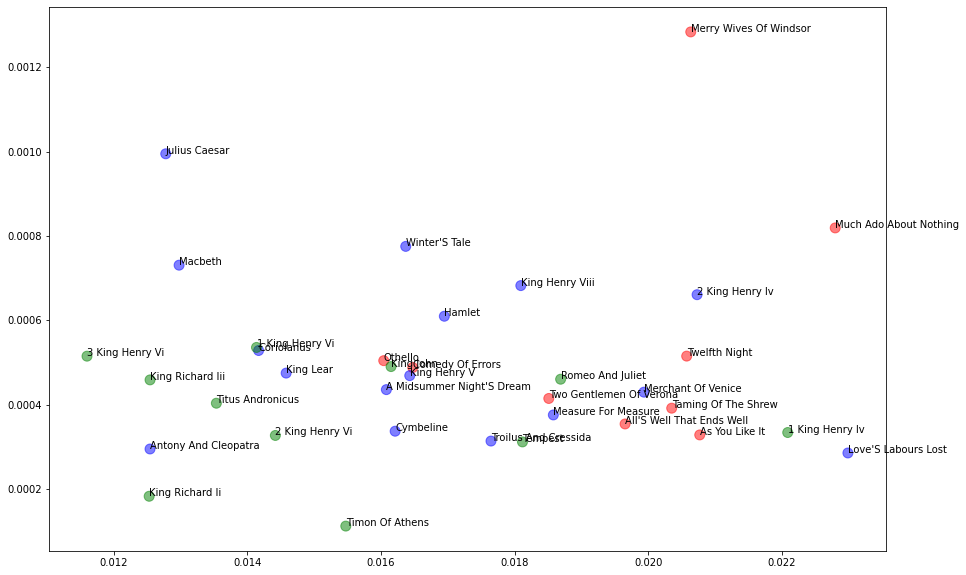

In [33]:
import matplotlib.pyplot as plt 

x = vectors[:,0]
y = vectors[:,1]
col_dict = {0:'red', 1:'blue', 2:'green'}
cols = [col_dict[l] for l in kmeans.labels_]

plt.figure(figsize=(15,10))
plt.scatter(x,y, c=cols, alpha=.5, s=100)
for i, l in enumerate(labels):
    plt.text(x[i],y[i], '{}'.format(labels[i] ))
plt.show()

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(vectors)

In [35]:
pca.explained_variance_ratio_

array([0.34189316, 0.14877679])

In [36]:
x = transformed[:,0]
y = transformed[:,1]

[0 1 0 2 1 1 1 2 0 2 1 1 2 0 0 2 0 2 0 1 0 2 2 2 2 0 1 1 1 1 2 1 1 1 1 1]
['red', 'blue', 'red', 'green', 'blue', 'blue', 'blue', 'green', 'red', 'green', 'blue', 'blue', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'blue', 'red', 'green', 'green', 'green', 'green', 'red', 'blue', 'blue', 'blue', 'blue', 'green', 'blue', 'blue', 'blue', 'blue', 'blue']


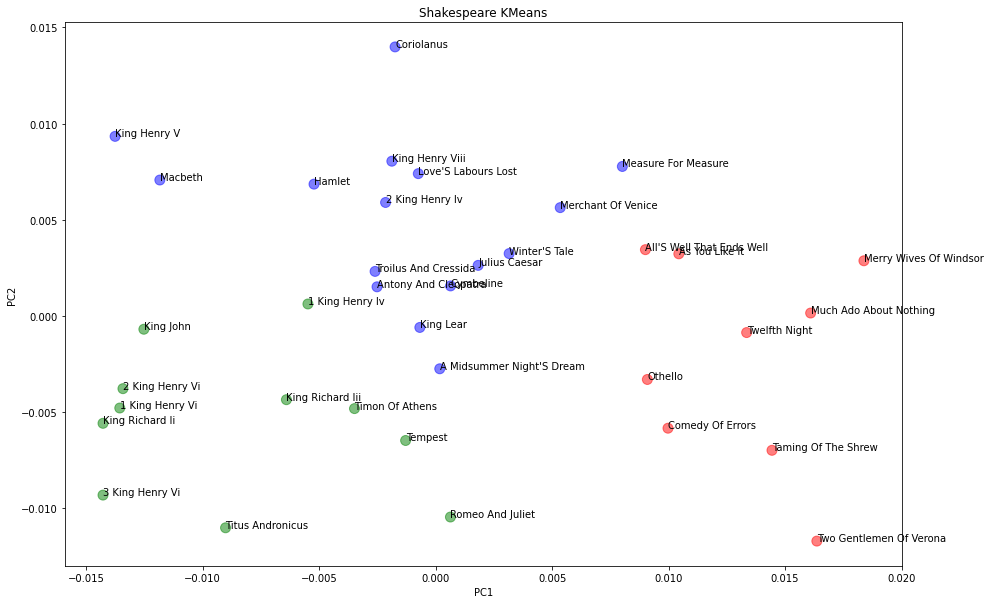

In [38]:
import matplotlib.pyplot as plt 

col_dict = {0:'red', 1:'blue', 2:'green'}
cols = [col_dict[l] for l in kmeans.labels_]
print(kmeans.labels_)
print(cols)
plt.figure(figsize=(15,10))
plt.scatter(x,y, c=cols, s=100, alpha=.5)
for i, l in enumerate(labels):
    plt.text(x[i],y[i], '{}'.format(labels[i]))
# for i, c in enumerate(pca.components_.transpose()):
#     plt.arrow(0,0, c[0]/50, c[1]/50, alpha=.1, width=.00001)
#     plt.text(c[0]/50, c[1]/50, features[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Shakespeare KMeans')
plt.show()

In [60]:
import glob, math
mb_path = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/macbeth.txt'
plays_path = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/*.txt'

plays_freqs = []
play_files = glob.glob(plays_path)
for play in play_files:
    tokens = preprocess(open(play, 'r').read())
    plays_freqs.append(token_frequency(tokens, relative=True))

df = document_frequency(plays_freqs)

top_tfidfs = []
for play in plays_freqs[:2]:
    play_tfidf = {}
    for token in play:
        tfidf = play[token] * math.log(len(play_files)/df[token])
        play_tfidf[token] = tfidf
    
    
    


{'if': 0.005362483242239868, 'music': 0.00030937403320614623, 'be': 0.010570279467876663, 'the': 0.028101474682891616, 'food': 5.156233886769104e-05, 'of': 0.021140558935753326, 'love': 0.003815613076209137, 'play': 0.0005156233886769104, 'on': 0.0034031143652676087, 'give': 0.0020109312158399506, 'me': 0.012271836650510468, 'excess': 5.156233886769104e-05, 'it': 0.01000309374033206, 'that': 0.014231205527482726, 'surfeiting': 5.156233886769104e-05, 'appetite': 0.00015468701660307311, 'may': 0.0019593688769722595, 'sicken': 5.156233886769104e-05, 'and': 0.024904609673094772, 'so': 0.006548417036196762, 'die': 0.00020624935547076416, 'strain': 5.156233886769104e-05, 'again': 0.0009796844384861298, 'had': 0.0016499948437661133, 'a': 0.020573373208208724, 'dying': 5.156233886769104e-05, 'fall': 0.00030937403320614623, 'o': 0.003867175415076828, 'came': 0.00030937403320614623, "o'er": 0.00020624935547076416, 'my': 0.017428070537279572, 'ear': 0.0002578116943384552, 'like': 0.00216561823244

In [29]:
docs = ['humpty dumpty sat on a wall', \
        'humpty dumpty had a great fall', \
        'the fall of the wall was great']

token_freqs = [token_frequency(preprocess(doc), relative=True) for doc in docs]
feats = [['humpty', 'dumpty'], ['wall', 'fall', 'great']]
for tf in token_freqs:
    print(token_group_frequency(tf, feats))

[0.3333333333333333, 0.16666666666666666]
[0.3333333333333333, 0.3333333333333333]
[0, 0.42857142857142855]


For each Shakespeare play find the words that have to top 50 tfidf scores.

Eliminate words with a document frequency <= 2.

Add the remaining words to the feature pool.

Once the feature set is compiled from all plays, use them to convert the plays into vectors and find most similar to least similar pairs.

In [25]:
import glob, math
plays_path = '/Users/anupam/Desktop/Corpora/author_collections/shakespeare/plaintext/*.txt'


plays_freqs = []
play_files = glob.glob(plays_path)
labels = [fn.split('/')[-1][:-4].replace('_', ' ').title() for fn in play_files]


for play in play_files:
    tokens = preprocess(open(play, 'r').read())
    plays_freqs.append(token_frequency(tokens, relative=True))

df = document_frequency(plays_freqs)

corpus_tfidf = []
for pf in plays_freqs:    
    tfidf = {}
    for token in pf:
        token_tfidf = pf[token] * math.log((len(play_files)/df[token]))
        tfidf[token] = token_tfidf
    tfidf_sorted = sorted(tfidf.items(), key = lambda x: x[1], reverse=True)[:50]
    tfidf_sorted = [w for w, tfidf in tfidf_sorted]
    tfidf_subset = [w for w in tfidf_sorted if df[w]>2]
    corpus_tfidf.append(tfidf_subset)

vectors = []
for i, f in enumerate(plays_freqs):
    vec = token_group_frequency(f, corpus_tfidf)
    vectors.append(vec)


In [26]:
vectors

[[0.008765597607507477,
  0.00010312467773538208,
  0.0007218727441476745,
  0.0007734350830153657,
  0.0019078065381045685,
  0.00020624935547076416,
  0.0006703104052799835,
  0.00020624935547076416,
  0.0031453026709291534,
  0.00020624935547076416,
  0.0011859337939568938,
  0.0005156233886769104,
  0.00020624935547076416,
  0.00030937403320614623,
  0.00046406104980921934,
  0.0005156233886769104,
  0.0021140558935753323,
  0.0005671857275446014,
  0.0005156233886769104,
  0.00030937403320614623,
  0.00020624935547076416,
  0.00030937403320614623,
  0.003145302670929154,
  0.0005671857275446014,
  0.0009796844384861298,
  0.004279674126018356,
  0.0014437454882953492,
  0.0006187480664122925,
  0.00030937403320614623,
  0.00020624935547076416,
  0.00020624935547076416,
  0.0029390533154583895,
  0.0011859337939568938,
  0.0011859337939568938,
  0.0003609363720738373,
  0.001649994843766113],
 [0.00041891396554432633,
  0.03251819657537834,
  0.00031418547415824476,
  0.00036654971

# Code for final assignment

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anupam/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
import glob
from nltk.corpus import stopwords

features = stopwords.words('english')
chunksize = 5000

corpus = []
labels = []
file_path = '/Users/anupam/Desktop/Corpora/author_collections/austen_alcott/*.txt'
file_paths = glob.glob(file_path)
for fp in file_paths:
    text = preprocess(open(fp, 'r').read())
    chunks = chunk_corpus(text, 5000)
    corpus.extend(chunks)
    label_root = fp.split('/')[-1][:-4]
    for i, c in enumerate(chunks):
        label = '{}_{:04d}'.format(label_root, i)
        labels.append(label)

vector_dicts = []
for c in corpus:
    tf = token_frequency(c)
    v = {k:tf[k] for k in tf if k in features}
    vector_dicts.append(v)

In [17]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)
vectors = vectorizer.fit_transform(vector_dicts)
features = vectorizer.feature_names_

print(vectors)

[[90.  1.  0. ...  0.  0.  0.]
 [96.  8.  1. ...  0.  1.  0.]
 [92.  6.  1. ...  0.  1.  0.]
 ...
 [82.  3.  2. ...  0.  0.  0.]
 [69.  4.  0. ...  1.  6.  1.]
 [57.  7.  0. ...  2.  7.  0.]]


In [21]:
from sklearn.cluster import KMeans

n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(vectors)
print(kmeans.labels_)

for nc in range(n_clusters):
    print("\nCluster {}:".format(nc))
    cluster_labels = [l for i, l in enumerate(labels) if kmeans.labels_[i]==nc]
    print(', '.join(cluster_labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Cluster 0:
austen_sense_and_sensibility_0000, austen_sense_and_sensibility_0001, austen_sense_and_sensibility_0002, austen_sense_and_sensibility_0003, austen_sense_and_sensibility_0004, austen_sense_and_sensibility_0005, austen_sense_and_sensibility_0006, austen_sense_and_sensibility_0007, austen_sense_and_sensibility_0008, austen_sense_and_sensibility_0009, austen_sense_and_sensibility_0010, austen_sense_and_sensibility_0011, austen_sense_and_sensibility_0012, austen_sense_and_sensibility_0013, austen_sense

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(vectors)

x = transformed[:,0]
y = transformed[:,1]

pca.explained_variance_ratio_


array([0.31454959, 0.17769692])

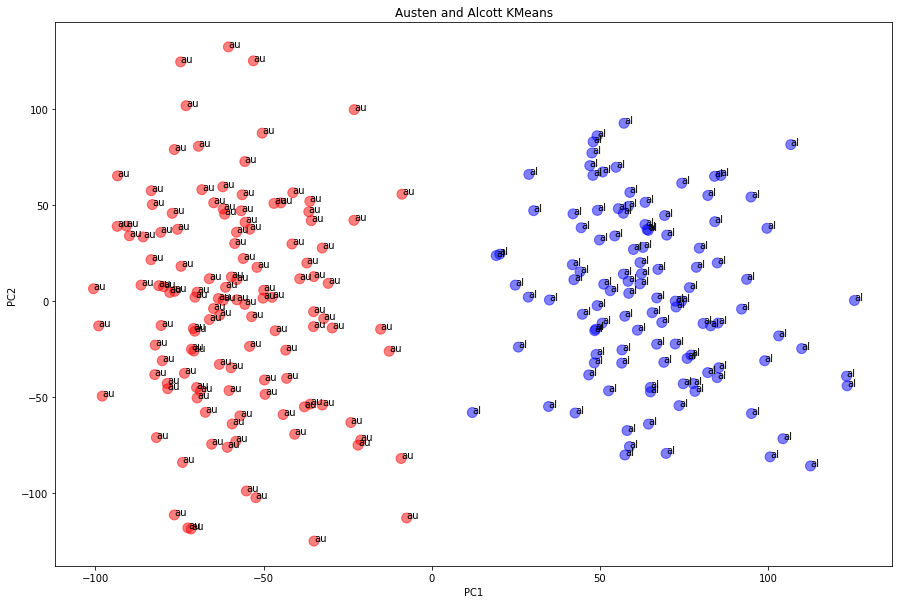

In [32]:
import matplotlib.pyplot as plt 

col_dict = {0:'red', 1:'blue'}
cols = [col_dict[l] for l in kmeans.labels_]

plt.figure(figsize=(15,10))
plt.scatter(x,y, c=cols, s=100, alpha=.5)
for i, l in enumerate(labels):
    plt.text(x[i],y[i], '{}'.format(labels[i][:2]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Austen and Alcott KMeans')
plt.show()

In [30]:
[labels[i] for i, l in enumerate(kmeans.labels_) if l==0 and labels[i].split('_')[0] == 'austen']

['austen_sense_and_sensibility_0000',
 'austen_sense_and_sensibility_0001',
 'austen_sense_and_sensibility_0002',
 'austen_sense_and_sensibility_0003',
 'austen_sense_and_sensibility_0004',
 'austen_sense_and_sensibility_0005',
 'austen_sense_and_sensibility_0006',
 'austen_sense_and_sensibility_0007',
 'austen_sense_and_sensibility_0008',
 'austen_sense_and_sensibility_0009',
 'austen_sense_and_sensibility_0010',
 'austen_sense_and_sensibility_0011',
 'austen_sense_and_sensibility_0012',
 'austen_sense_and_sensibility_0013',
 'austen_sense_and_sensibility_0014',
 'austen_sense_and_sensibility_0015',
 'austen_sense_and_sensibility_0016',
 'austen_sense_and_sensibility_0017',
 'austen_sense_and_sensibility_0018',
 'austen_sense_and_sensibility_0019',
 'austen_sense_and_sensibility_0020',
 'austen_sense_and_sensibility_0021',
 'austen_sense_and_sensibility_0022',
 'austen_persuasion_0000',
 'austen_persuasion_0001',
 'austen_persuasion_0002',
 'austen_persuasion_0003',
 'austen_persuasio

# Topic Modeling

In [77]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import DictVectorizer

no_topics = 100
file_path = '/Users/anupam/Desktop/Corpora/author_collections/austen_alcott/*.txt'
file_paths = glob.glob(file_path)

vectors = []
for fp in file_paths:
    text = preprocess(open(fp, 'r').read())
    tf = token_frequency(text, relative=True)
    vectors.append(tf)
    
    
vectorizer = DictVectorizer(sparse=False)
vectors = vectorizer.fit_transform(vectors)
features = vectorizer.feature_names_

lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5).fit(vectors)
vectors = lda.transform(vectors)

In [81]:
print(lda.components_.shape)

(100, 31303)
